<a href="https://colab.research.google.com/github/fwade0572/Hands-On-Data-Analysis-with-Pandas-2nd-edition/blob/master/DSC400_T301_2_2_Assignment_Faith_Wade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping
- Identify a website that allows for legal scraping and collect data using requests and BeautifulSoup.
- Ensure compliance with the website’s robots.txt and terms of service.

In [1]:
# Importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Inputting a request for a completely 100% legal website for educational scraping purposes.
url = 'https://books.toscrape.com/'
response = requests.get(url)
# Checking response is successful.
if response.ok:
    print("Response is successful!")
else:
    print("Failed to retreive data.")

Response is successful!


In [3]:
# Parsing the webpage for BeautifulSoup to use.
soup = BeautifulSoup(response.text, 'html.parser')
print("Page parsed with BeautifulSoup.")

Page parsed with BeautifulSoup.


In [6]:
# Extracting both the book titles and their prices.
titles = soup.find_all('a', title=True)
prices = soup.find_all('p', class_='price_color')
book_titles = [t.get("title") for t in titles]
book_prices = [p.get_text() for p in prices]
print("Extracted book titles and prices!")

Extracted book titles and prices!


In [7]:
# Creating a DataFrame.
books_df = pd.DataFrame({
    'Title': book_titles,
    'Price': book_prices
})
print("Scraped Data:")
print(books_df.head())

Scraped Data:
                                   Title    Price
0                   A Light in the Attic  Â£51.77
1                     Tipping the Velvet  Â£53.74
2                             Soumission  Â£50.10
3                          Sharp Objects  Â£47.82
4  Sapiens: A Brief History of Humankind  Â£54.23


# Data Cleaning & Preparation
- Clean the scraped data to address issues such as missing values, inconsistencies, and outliers.

- Use pandas for data wrangling tasks to prepare the data for analysis.


In [9]:
# Getting rid of any possible duplicates:
print("\nNumber of entries before removing duplicates:", books_df.shape[0])
books_df.drop_duplicates(inplace=True)
print("number of entries after removing duplicates:", books_df.shape[0])


Number of entries before removing duplicates: 20
number of entries after removing duplicates: 20


In [11]:
# Checking for missing values:
books_df.isnull().sum()
# There are none, which means we should get accurate results.

,0
Title,0
Price,0


In [22]:
# Removing any outliers:
Q1 = books_df['Price'].quantile(0.25)
Q3 = books_df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
books_df_clean = books_df[
    (books_df['Price'] >= lower_bound) &
    (books_df['Price'] <= upper_bound)
]

print("New DataFrame:\n", books_df_clean.shape)
books_df_clean.head()

New DataFrame:
 (20, 2)


,Title,Price
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History of Humankind,54.23


# Feature Engineering
- Create new features from the existing data that can provide additional insights

In [25]:
# Feature Engineering No.1, Normalization:
price_min = books_df_clean['Price'].min()
price_max = books_df_clean['Price'].max()
books_df_clean['Price_norm'] = (books_df_clean['Price'] - price_min) / (price_max - price_min)
print(books_df_clean['Price_norm'].head())

0    0.873324
1    0.918863
2    0.834720
3    0.782016
4    0.930190
Name: Price_norm, dtype: float64


In [28]:
# Feature Engineering No.2, Binning:
bins = 3
labels = ['Low', 'Medium', 'High']
books_df_clean['Price_bin'] = pd.cut(
    books_df_clean['Price'],
    bins=bins,
    labels=labels,
)
print(books_df_clean[['Price', 'Price_norm', 'Price_bin']].head())

   Price  Price_norm Price_bin
0  51.77    0.873324      High
1  53.74    0.918863      High
2  50.10    0.834720      High
3  47.82    0.782016      High
4  54.23    0.930190      High


# Data Aggregation
- Organize your data using .groupby() and compute aggregate statistics to uncover trends and patterns.

In [32]:
# Using the groupby function to test and compare a couple of different categories.

# Price per Bin:
avg_price_bin = books_df_clean.groupby("Price_bin")["Price"].mean()
print("Price per bin:")
print(avg_price_bin)

# Count per Bin:
count = books_df_clean.groupby("Price_bin")["Title"].count()
print("\nCount Per Bin:")
print(count)

# Putting the statistics together to pinpoint any trends/patterns:
price_bin_stats = books_df_clean.groupby("Price_bin")["Price"].agg(["mean", "median", "min", "max", "std", "count"])
print("\nOverall Statistics:")
print(price_bin_stats)

Price per bin:
Price_bin
Low       19.881429
Medium    35.316667
High      51.585000
Name: Price, dtype: float64

Count Per Bin:
Price_bin
Low        7
Medium     3
High      10
Name: Title, dtype: int64

Overall Statistics:
                mean  median    min    max       std  count
Price_bin                                                  
Low        19.881429   20.66  13.99  23.88  3.559745      7
Medium     35.316667   35.02  33.34  37.59  2.140475      3
High       51.585000   51.96  45.17  57.25  3.369478     10


/tmp/ipython-input-2528787688.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_bin = books_df_clean.groupby("Price_bin")["Price"].mean()
/tmp/ipython-input-2528787688.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = books_df_clean.groupby("Price_bin")["Title"].count()
/tmp/ipython-input-2528787688.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_bin_stats = books_df_clean.groupby("Price_

# Data Visualization
- Use visualization tools like Matplotlib or Seaborn to create graphs that effectively communicate your findings.

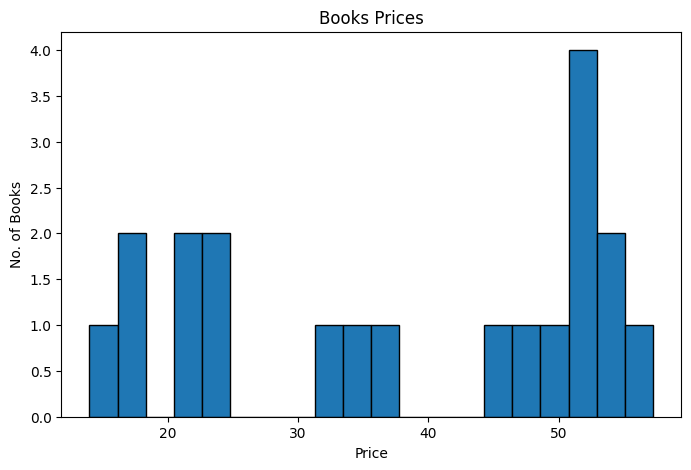

In [33]:
# Creating a histogram:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(books_df_clean["Price"], bins=20, edgecolor="black")
plt.title("Books Prices")
plt.xlabel("Price")
plt.ylabel("No. of Books")
plt.tight_layout
plt.show()

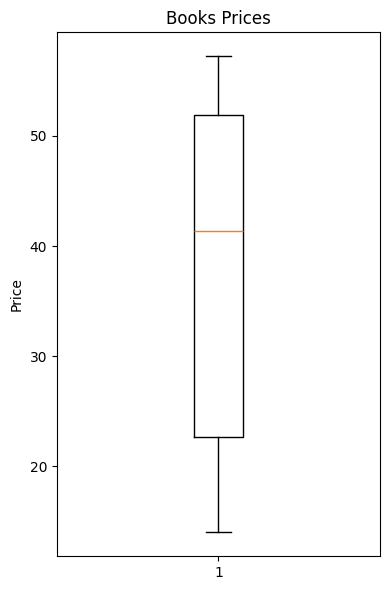

In [35]:
# Creating a boxplot:
plt.figure(figsize=(4, 6))
plt.boxplot(books_df_clean['Price'], vert=True)
plt.title("Books Prices")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# Code Attribution:
Title: 2.2 Assignment

Author: Wes McKinney

Date: 14 December 2025

Modified By: Faith Wade

Description: This program is used to use web scraping as another form of media to go and clean, feature engineer, aggregate, and visualize the findings.
***
Title: Python for Data Analysis

Author: Wes McKinney

Date: 14 December 2025

Modified By: Faith Wade

Description: This program was modified to take the website 'https://books.toscrape.com/' and webscrap for data using Python Requests and BeautifulSoup in order to clean, feature engineer, aggregate, and create visualizations to present the findings to overall patterns and trends.

Source(s):

https://github.com/bellevue-university/dsc400-updated/blob/main/11-week/week02/week2_assignment.ipynb

https://www.geeksforgeeks.org/data-science/detect-and-remove-the-outliers-using-python/

https://www.geeksforgeeks.org/python/grouping-and-aggregating-with-pandas/

https://www.geeksforgeeks.org/data-visualization/plotting-histogram-in-python-using-matplotlib/

https://www.geeksforgeeks.org/machine-learning/box-plot/